<a href="https://colab.research.google.com/github/Diptanil-Chakraborty/Simulated-Annealing/blob/main/Simulated%20Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Read the csv file and capture data into a pandas dataframe
import pandas as pd
df=pd.read_csv("/content/steel_strength.csv")

In [63]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [64]:
df.isna().sum()

formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,312.0,0.096442,0.109008,0.00,0.010,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.010,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.010,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.100,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.960,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.500,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.010,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.010,0.010,0.0100,2.50
co,312.0,7.008782,6.254431,0.01,0.010,7.085,13.4800,20.10


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'mn'}>,
        <Axes: title={'center': 'si'}>, <Axes: title={'center': 'cr'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'mo'}>,
        <Axes: title={'center': 'v'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'nb'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'w'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'ti'}>,
        <Axes: title={'center': 'yield strength'}>,
        <Axes: title={'center': 'tensile strength'}>,
        <Axes: title={'center': 'elongation'}>]], dtype=object)

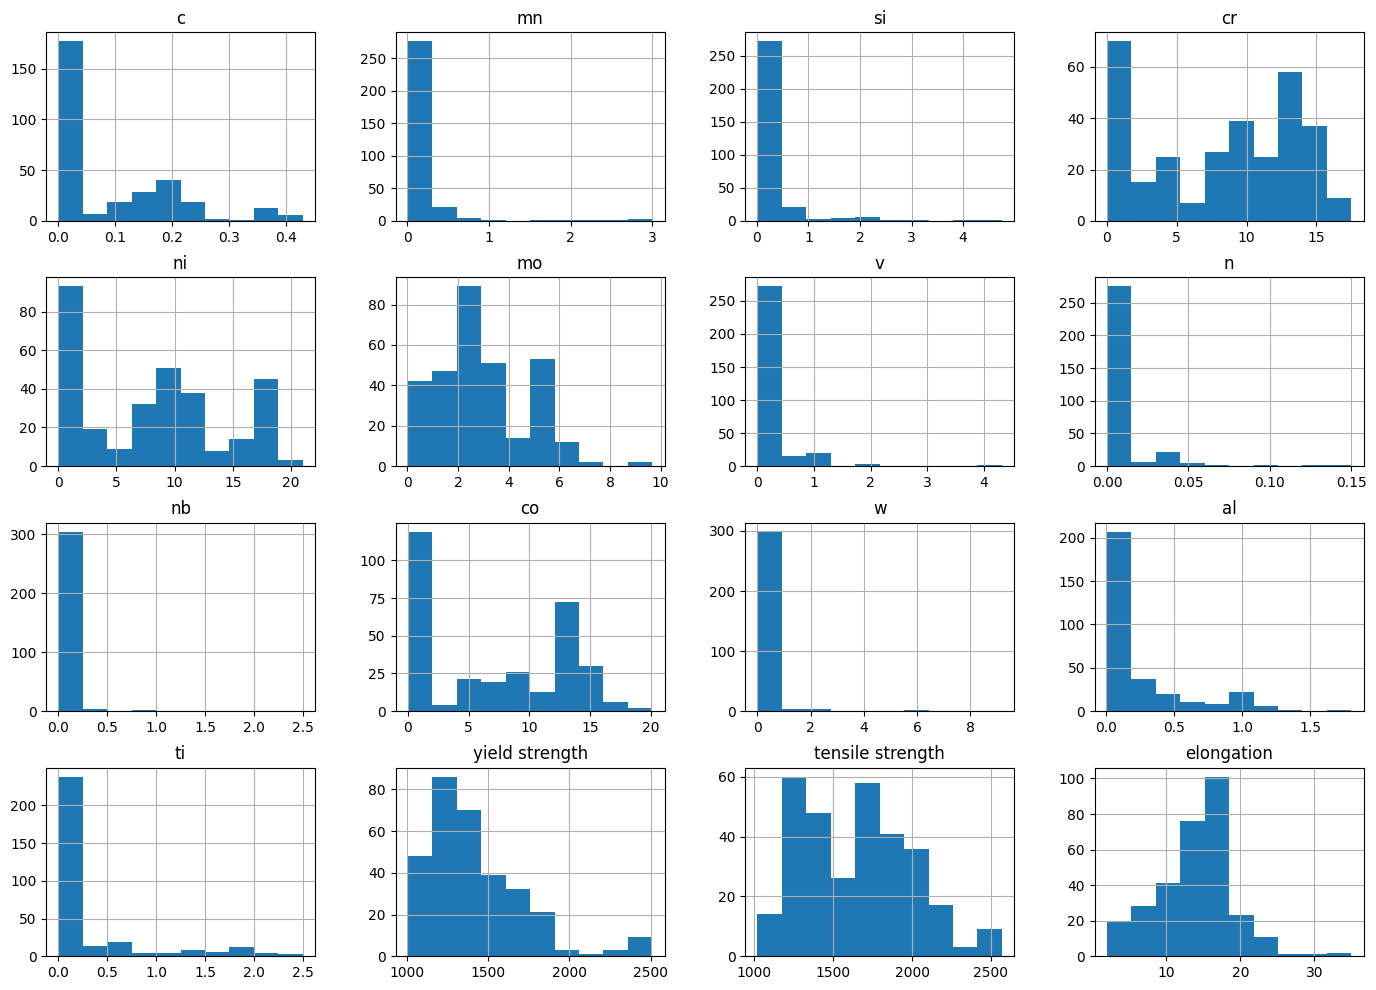

In [66]:
df.hist(figsize=(17,12))

In [67]:
#Define the X values by dropping all irrelevant columns
X = df.drop(columns=["formula", "elongation", "tensile strength", "yield strength"])
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [68]:
#Define y
y = df['yield strength']

Split data into train and test sets.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.2, random_state = 42)

# Define a model for the problem - the model that can be used later as an objective function for optimization
Import the ML algorithm for regression - here, we will import the Random Forest Regressor from scikit-learn.
Please note that Colab comes with most of the required libraries. You need to make sure you install all the required libraries in case you are running the code locally.

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100)

Predict using the trained model on our test data.

In [71]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  116.46761287830809


Text(0, 0.5, 'Predicted')

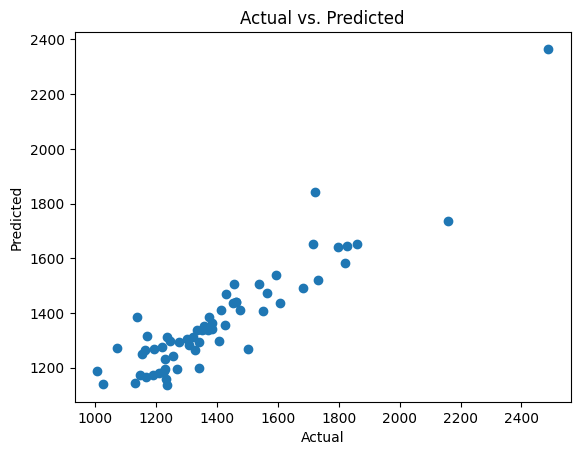

In [72]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

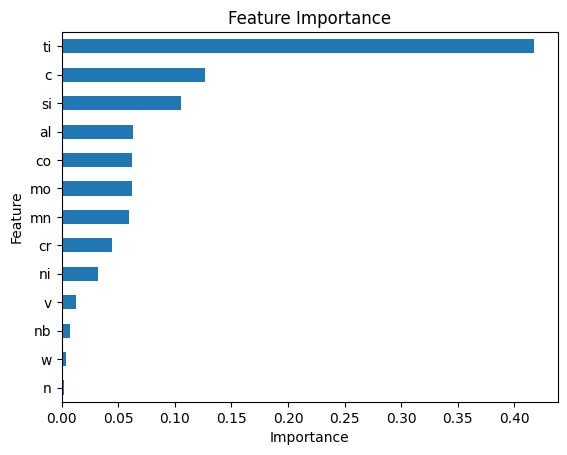

In [73]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features)
# Plot 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [74]:
model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
model_full.fit(X, y)

RandomForestRegressor(max_depth=100, random_state=42)

In [75]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def obj_fun(X):
    X = [X]
    results = model_full.predict(X)

    return - results  #Negative sign since we are trying to minize the value.

In [76]:
boundaries = np.array([[df['c'].min(), df['c'].max()],
[df['mn'].min(), df['mn'].max()],
[df['si'].min(), df['si'].max()],
[df['cr'].min(), df['cr'].max()],
[df['ni'].min(), df['ni'].max()],
[df['mo'].min(), df['mo'].max()],
[df['v'].min(), df['v'].max()],
[df['n'].min(), df['n'].max()],
[df['nb'].min(), df['nb'].max()],
[df['co'].min(), df['co'].max()],
[df['w'].min(), df['w'].max()],
[df['al'].min(), df['al'].max()],
[df['ti'].min(), df['ti'].max()]])
print(boundaries)

[[0.00e+00 4.30e-01]
 [1.00e-02 3.00e+00]
 [1.00e-02 4.75e+00]
 [1.00e-02 1.75e+01]
 [1.00e-02 2.10e+01]
 [2.00e-02 9.67e+00]
 [0.00e+00 4.32e+00]
 [0.00e+00 1.50e-01]
 [0.00e+00 2.50e+00]
 [1.00e-02 2.01e+01]
 [0.00e+00 9.18e+00]
 [1.00e-02 1.80e+00]
 [0.00e+00 2.50e+00]]


In [77]:
# Define the simulated annealing algorithm
def simulated_annealing(obj_func, bounds, t_init, t_final, cooling_rate):
    """Simulate annealing algorithm for optimization.

    Parameters:
    obj_func (function): The objective function to be optimized.
    bounds (ndarray): An array with the bounds for each parameter of the objective function.
    t_init (float): The initial temperature for the algorithm.
    t_final (float): The final temperature for the algorithm.
    cooling_rate (float): The cooling rate for the algorithm.

    Returns:
    tuple: A tuple containing the final solution and its quality, and the list of temperatures.

    """
    # Initialize the current solution and temperature
    num_params = bounds.shape[0]
    current_params = np.array([random.uniform(bounds[i][0], bounds[i][1]) for i in range(num_params)])
    current_solution = obj_func(current_params)
    t_current = t_init
    temperatures = [t_current]

    # Iterate until the temperature is below the final temperature
    while t_current > t_final:
        # Randomly perturb the current solution
        perturbed_params = np.array([random.uniform(bounds[i][0], bounds[i][1]) for i in range(num_params)])
        perturbed_solution = obj_func(perturbed_params)

        # Calculate the change in solution quality
        delta = perturbed_solution - current_solution

        # If the perturbed solution is better, accept it as the new current solution
        if delta < 0:
            current_params = perturbed_params
            current_solution = perturbed_solution
        # If the perturbed solution is worse, accept it with a certain probability
        else:
            probability = math.exp(-delta / t_current)
            if random.random() < probability:
                current_params = perturbed_params
                current_solution = perturbed_solution

        # Decrease the temperature according to the cooling rate
        t_current *= cooling_rate
        temperatures.append(t_current)

    # Return the final solution and its quality, and the list of temperatures
    return current_params, current_solution, temperatures




In [78]:
# Set the bounds and run the simulated annealing algorithm
bounds = boundaries
t_init, t_final, cooling_rate = 100, 0.1, 0.95
final_solution, final_quality, temperatures = simulated_annealing(obj_fun, bounds, t_init, t_final, cooling_rate)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
<ipython-input-77-eafa91ff6b07>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probability = math.exp(-delta / t_current)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitte

Final solution:  [ 0.41717798  1.67583605  0.96119234 12.48764084 12.11339769  7.35099703
  0.21902193  0.06242747  0.86624254 14.82514349  6.34971827  0.91331013
  1.45010237]
Final yield strength of our amazing alloy which cannot be detroyed, Wallium :)  [2420.353]
____________________________________________________________
____________________________________________________________


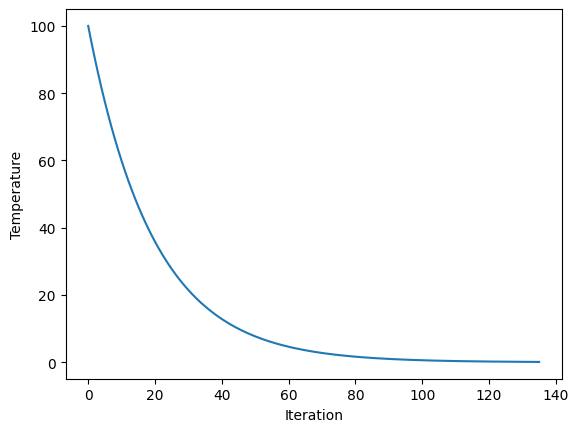

In [79]:
# Print the final solution and its quality
print("Final solution: ", final_solution)
print("Final yield strength of our amazing alloy which cannot be detroyed, Wallium :) ", -final_quality)
print("____________________________________________________________")
print("____________________________________________________________")
# Plot the temperature versus iteration
plt.plot(temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()